You are given the `root` of a binary tree with unique values, and an integer `start`. At minute `0`, an **infection** starts from the node with value `start`.

Each minute, a node becomes infected if:
- The node is currently uninfected.
- The node is adjacent to an infected node.

Return *the number of minutes needed for the entire tree to be infected*.

<br>

**Example 1:**

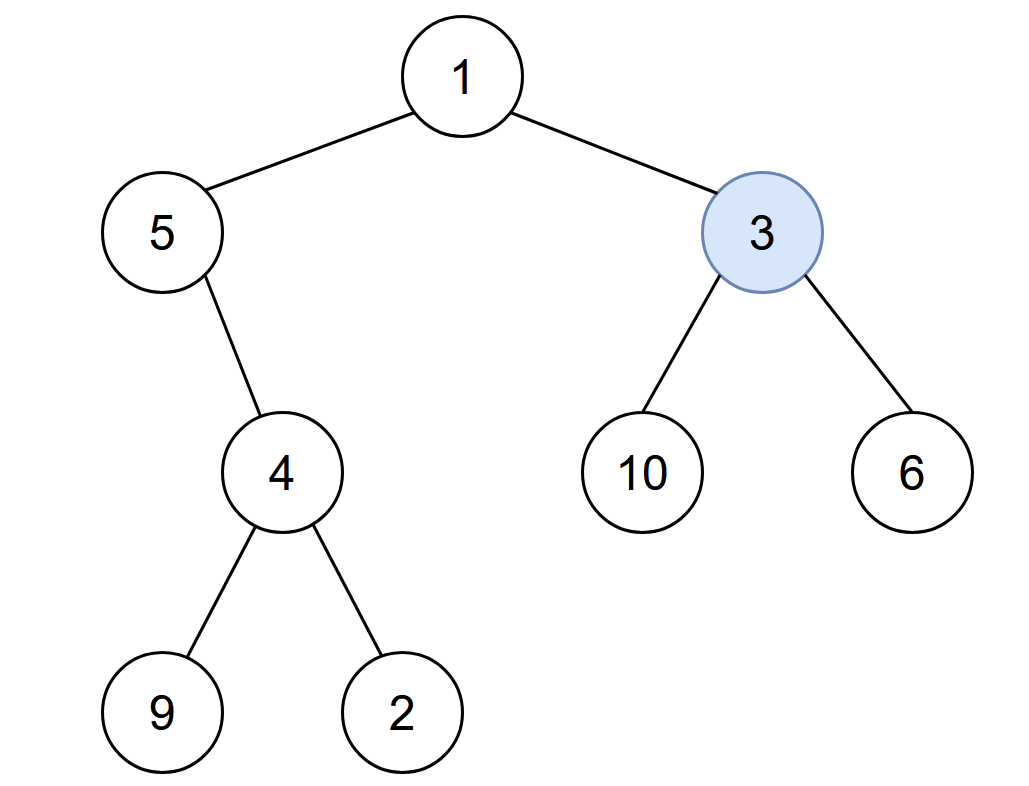

>**Input:** root = [1,5,3,null,4,10,6,9,2], start = 3<br>
>**Output:** 4<br>
>**Explanation:** The following nodes are infected during:<br>
>\- Minute 0: Node 3<br>
>\- Minute 1: Nodes 1, 10 and 6<br>
>\- Minute 2: Node 5<br>
>\- Minute 3: Node 4<br>
>\- Minute 4: Nodes 9 and 2<br>
>It takes 4 minutes for the whole tree to be infected so we return 4.

**Example 2:**

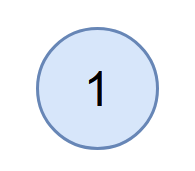

>**Input:** root = [1], start = 1<br>
>**Output:** 0<br>
>**Explanation:** At minute 0, the only node in the tree is infected so we return 0.
 
<br>

**Constraints:**

- >The number of nodes in the tree is in the range [1, 10<sup>5</sup>].
- >1 <= Node.val <= 10<sup>5</sup>
- >Each node has a **unique** value.
- >A node with a value of start exists in the tree.

In [1]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def amountOfTime(self, root, start: int) -> int:
        from collections import deque, defaultdict

        graph = defaultdict(list)
        stack = [(root,None)]
        while stack:
            n, p = stack.pop()
            
            if p:
                graph[p.val].append(n.val)
                graph[n.val].append(p.val)
            
            if n.left:
                stack.append((n.left,n))
            
            if n.right:
                stack.append((n.right,n))
        
        ans = -1
        seen = {start}
        queue = deque([start])
        
        while queue:
            for _ in range(len(queue)):
                
                u = queue.popleft()
                for v in graph[u]:
                    
                    if v not in seen:
                        seen.add(v)
                        queue.append(v)
            
            ans += 1
        
        return ans